In [61]:
from qubit_zz_coupling.utils import exp_decay, ramsey, make_population
from qubit_zz_coupling.core import setup_operators, solve_t1, solve_t2, make_population, plot_t1, plot_t2

from qutip import basis, tensor, sigmaz, sigmax, sigmay, sigmam, mesolve, identity, Qobj, destroy, qeye, Bloch, about
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from qtt.algorithms.functions import fit_gauss_ramsey

In [ ]:
fq = 5.0
t1 = 100
t2 = 50

sz_q = sigmaz()
sm_q = sigmam()
n = sm_q.dag()*sm_q

H = 2 * np.pi * fq / 2 * sz_q

c_ops = [
        np.sqrt(1/t1) * sm_q,
        np.sqrt(1/(2*t2))* sz_q,
    ]

[9.99999430e-01 1.00000007e+02 4.05177861e-07]


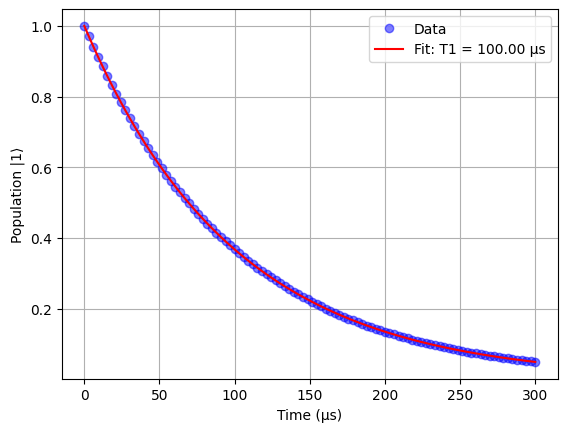

In [78]:
tlist = np.linspace(0, 300, 100)  # Time points in μs

# T1 measurement for Qubit 1 
psi0 = basis(2,0)

fit_par, pop = solve_t1(H, psi0, tlist, c_ops, [sz_q], ret_pop=True)

print(fit_par)
fig, ax = plt.subplots()
ax.plot(tlist, pop, 'bo', alpha=0.5, label='Data')
ax.plot(tlist, exp_decay(tlist, *fit_par), 'r-', label=f'Fit: T1 = {fit_par[1]:.2f} μs')
#ax.set_title(f'T2 - {label_Qbit} (JTLS = {system_params["JTLS"]}, Jzz = {system_params["Jzz"]}, Jxx = {system_params["Jxx"]})')
ax.set_xlabel('Time (μs)')
ax.set_ylabel('Population |1⟩')
ax.legend()
ax.grid(True)


In [ ]:
# T2 test

[ 6.19761091e-01  1.00080620e+02  5.65125868e-07 -5.53930804e+01
  5.00000051e-01]


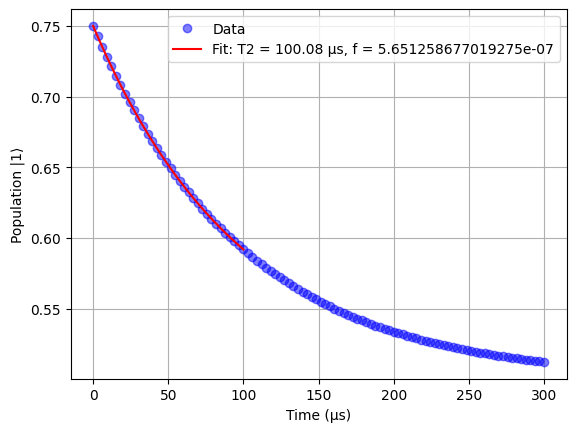

In [96]:
# T1 measurement for Qubit 1 
psi0 = (basis(2,0)+basis(2,1)).unit()

first_guess = []
fit_par, pop = solve_t2(H, psi0, tlist, c_ops, [sigmam().dag()*sigmam()], first_guess=first_guess, ret_pop=True, use_fit_gauss=True)

print(fit_par)
fig, ax = plt.subplots()
ax.plot(tlist, pop, 'bo', alpha=0.5, label='Data')
ax.plot(np.linspace(0, 100, 500) , ramsey(np.linspace(0, 100, 500), *fit_par), 'r', label=f'Fit: T2 = {fit_par[1]:.2f} μs, f = {fit_par[2]}')
#ax.set_title(f'T2 - {label_Qbit} (JTLS = {system_params["JTLS"]}, Jzz = {system_params["Jzz"]}, Jxx = {system_params["Jxx"]})')
ax.set_xlabel('Time (μs)')
ax.set_ylabel('Population |1⟩')
ax.legend()
ax.grid(True)

In [40]:
T = 1 / 0.066


In [95]:
print(sigmax())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]


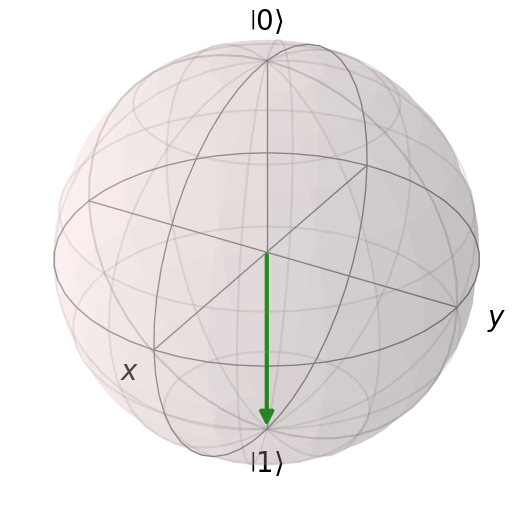

In [94]:
psi0 = basis(2,1)
# Create Bloch sphere plot
sphere = Bloch()
sphere.add_states(psi0)
sphere.show()